In [47]:
from ultralytics import YOLO

import torch
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [48]:
# Load area_detection_model
area_detection_model = YOLO("./runs/detect/train/weights/best.pt")

8776c632229a57070fce9cff57c2b04d_d3d3Lmdvdi51awkxNTEuMTAxLjUyLjE0NA==.xls-4-1.png

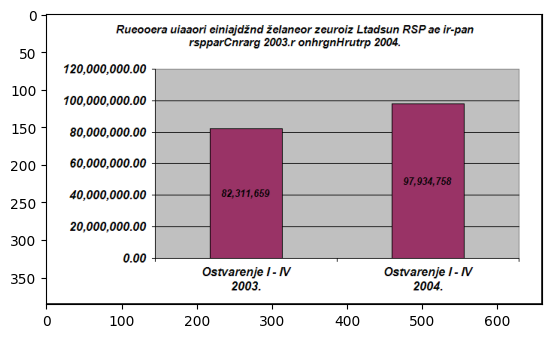

In [ ]:
img_path = "../../assets/dataset/reduce/bardata(1031)/bar/images/train2019/013643546a25fd94fa9345a763b83304_d3d3Lmdvdi5tZQkxOTUuNjYuMTY2Ljgx.xls-0-0.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [76]:
results = area_detection_model(img_path)[0]
results.save("./test_images/output.png")


image 1/1 d:\Projects\ChartInsight\training\object_detection\..\..\assets\dataset\reduce\bardata(1031)\bar\images\train2019\013643546a25fd94fa9345a763b83304_d3d3Lmdvdi5tZQkxOTUuNjYuMTY2Ljgx.xls-0-0.png: 384x640 1 ChartTitle, 1 PlotArea, 1 InnerPlotArea, 267.1ms
Speed: 3.5ms preprocess, 267.1ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


'./test_images/output.png'

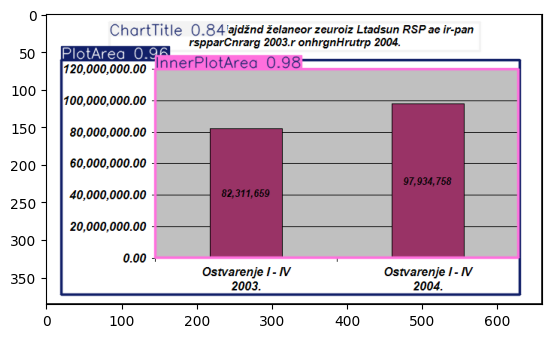

In [77]:
# Display results
res = cv2.imread("./test_images/output.png")
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plt.imshow(res)

In [78]:
results.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 4., 2.], device='cuda:0')
conf: tensor([0.9775, 0.9626, 0.8409], device='cuda:0')
data: tensor([[145.6056,  74.2527, 628.9503, 324.6234,   0.9775,   5.0000],
        [ 20.7592,  62.0197, 630.7706, 373.9297,   0.9626,   4.0000],
        [ 84.7154,  12.6216, 577.6978,  50.1352,   0.8409,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (386, 660)
shape: torch.Size([3, 6])
xywh: tensor([[387.2780, 199.4381, 483.3447, 250.3707],
        [325.7649, 217.9747, 610.0114, 311.9100],
        [331.2066,  31.3784, 492.9823,  37.5136]], device='cuda:0')
xywhn: tensor([[0.5868, 0.5167, 0.7323, 0.6486],
        [0.4936, 0.5647, 0.9243, 0.8081],
        [0.5018, 0.0813, 0.7469, 0.0972]], device='cuda:0')
xyxy: tensor([[145.6056,  74.2527, 628.9503, 324.6234],
        [ 20.7592,  62.0197, 630.7706, 373.9297],
        [ 84.7154,  12.6216, 577.6978,  50.1352]], device='cuda:0')
xyxyn: tensor([[0.2206, 0.1924, 0.95

### Get plot area cls: 4

In [ ]:
data = results.boxes.data
data

tensor([[145.6056,  74.2527, 628.9503, 324.6234,   0.9775,   5.0000],
        [ 20.7592,  62.0197, 630.7706, 373.9297,   0.9626,   4.0000],
        [ 84.7154,  12.6216, 577.6978,  50.1352,   0.8409,   2.0000]], device='cuda:0')

In [80]:
cls_target = 4 
bbox_cls_4 = data[data[:, 5] == cls_target]
bbox_cls_4

tensor([[ 20.7592,  62.0197, 630.7706, 373.9297,   0.9626,   4.0000]], device='cuda:0')

In [81]:
bbox_cls_4 = bbox_cls_4[0].cpu().numpy()
bbox_cls_4

array([     20.759,       62.02,      630.77,      373.93,     0.96265,           4], dtype=float32)

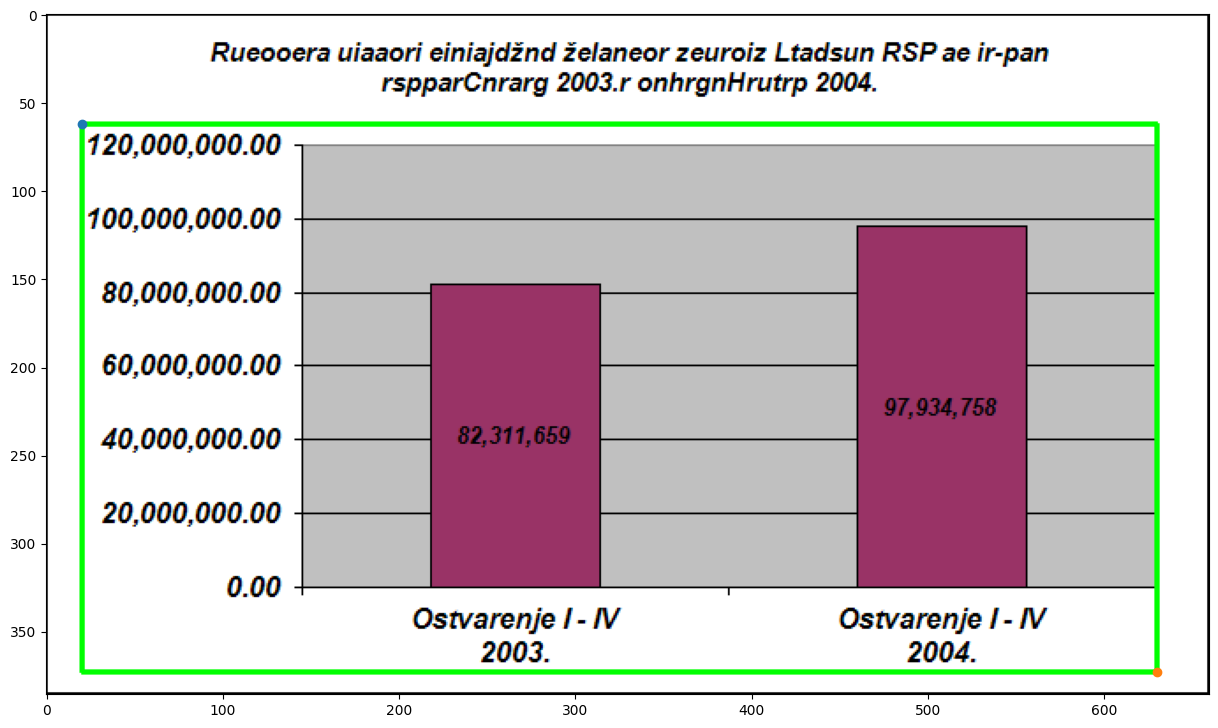

In [82]:
plt.figure(figsize=(15, 10))

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_copy = img.copy()

x1, y1, x2, y2, conf, cls = map(int, bbox_cls_4[:6])
cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

plt.imshow(img_copy)

In [83]:
bbox_cls_4


array([     20.759,       62.02,      630.77,      373.93,     0.96265,           4], dtype=float32)

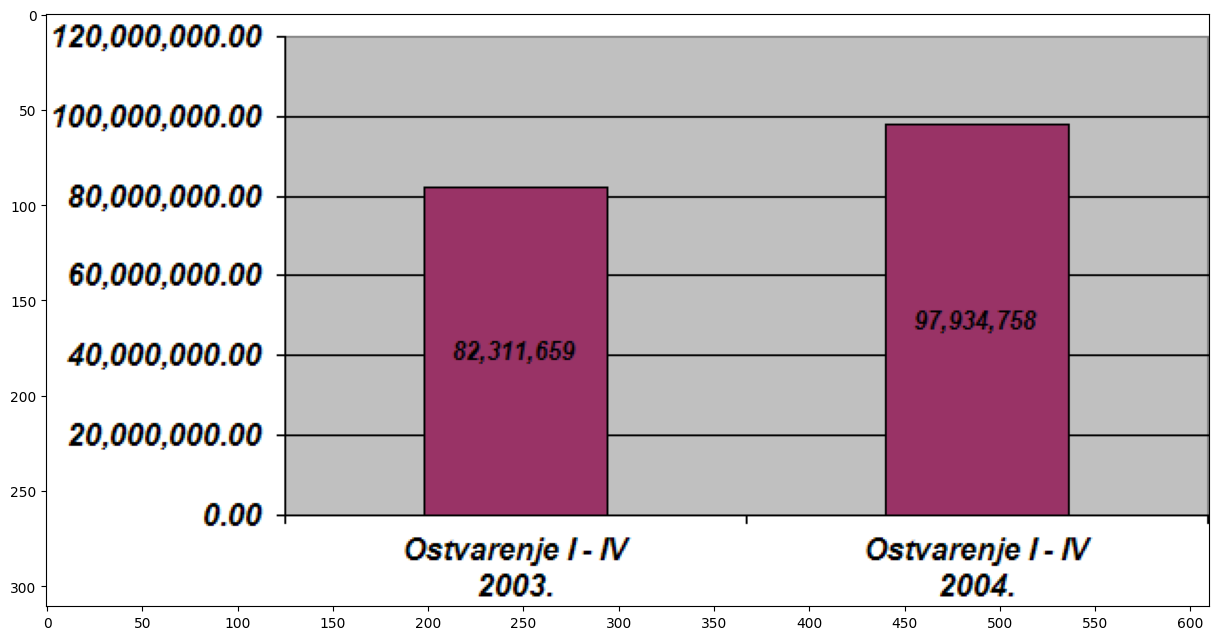

In [84]:
plt.figure(figsize=(15, 10))

x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
cropped_img = img[y1:y2, x1:x2]

x_ticks = np.arange(0, img.shape[1], step=50) 
plt.xticks(x_ticks)  
plt.imshow(cropped_img)

### Apply Barchart detection model

In [85]:
bar_detection = YOLO('../../testing/barchart/runs/detect/train/weights/best.pt')

In [86]:
bar_res = bar_detection(cropped_img)[0]
bar_res.save('./test_images/bar_test')


0: 352x640 2 Seriess, 49.0ms
Speed: 1.8ms preprocess, 49.0ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


'./test_images/bar_test'

In [87]:
bar_anns = bar_res.boxes.data.cpu().numpy()
bar_anns

array([[     441.95,      57.163,      536.12,      259.67,     0.97729,           0],
       [     199.39,      87.938,      294.06,      263.08,     0.95832,           0]], dtype=float32)

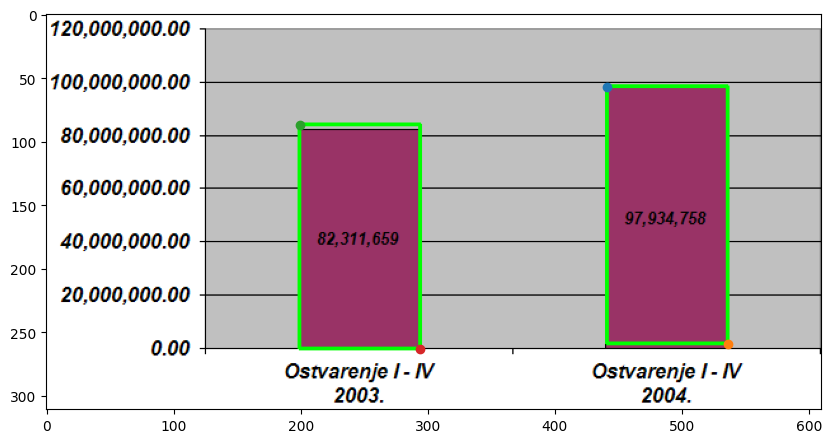

In [88]:
cropped_copy = cropped_img.copy()

plt.figure(figsize=(10, 8))
for bbox in bar_anns:
    x1, y1, x2, y2, conf, cls = map(int, bbox[:6])
    cv2.rectangle(cropped_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # print(x1, y1)
    # print(x2, y2)
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)



plt.imshow(cropped_copy)